# 1. Fixed-point iteration

Rewrite $f(x) = 0$ as $x = \phi(x)$ so that
$$f(x_*) = 0 \Leftrightarrow x_* = \phi(x_*),$$
where $x_*$ is the root of the first equation.

The simplest way of costructing $\phi(x)$ is
$$\phi(x) = x - \alpha f(x).$$

The iterative process
$$x_{n+1} = \phi(x_{n})$$
converges to the root $x_*$ if $\lim\limits_{n \rightarrow} x_n = x_*$.

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$ in the form

$$
\phi(x) = x - \alpha f(x),
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$ (visualize this dependence for three different values of $epsilon$). Compare your results to an expectation that the optimal value of $\alpha$ is given by 

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval (highlight it on the plot).

In [11]:
import numpy as np

%matplotlib notebook

import matplotlib.pyplot as plt

In [12]:
def f(x):
    return np.sqrt(x)


def g(x):
    return np.cos(x)


def gen(x):
    return f(x) - g(x)


def gen_prime(x, sign = 1.0):
    return sign * (1 / (2 * np.sqrt(x)) + np.sin(x))

<IPython.core.display.Javascript object>


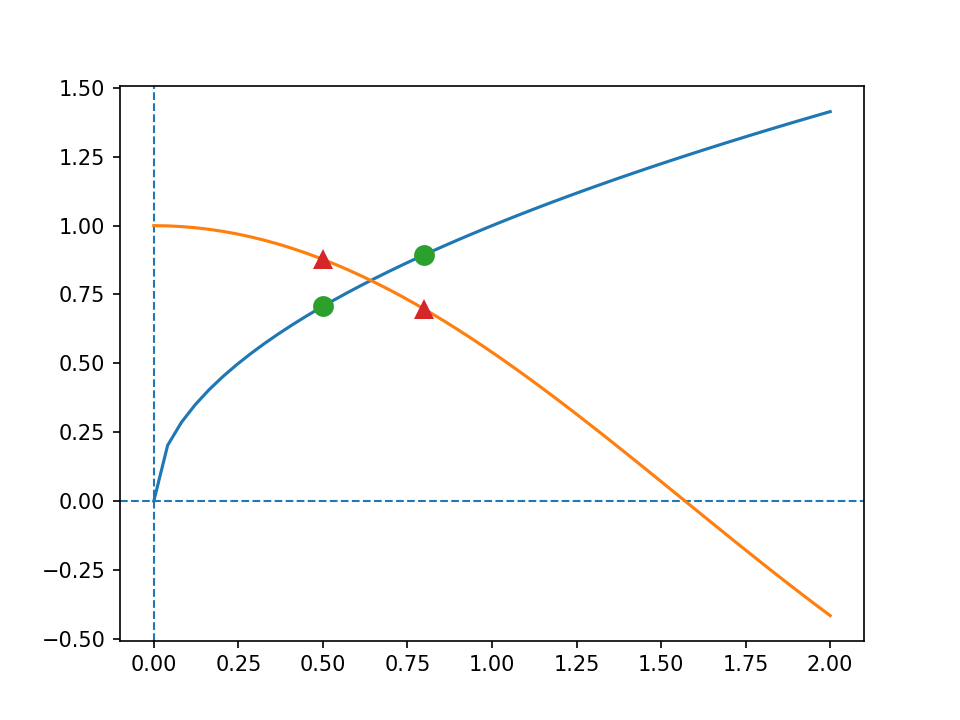

In [13]:
xx = np.linspace(0, 2)
fig, ax = plt.subplots()
ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
ax.plot(xx, f(xx))
ax.plot(xx, g(xx))
#ax.plot(xx, gen(xx))

plt.plot([0.5, 0.8], [f(0.5), f(0.8)], 'o', ms=10, mec='none')
plt.plot([0.5, 0.8], [g(0.5), g(0.8)], '^', ms=10, mec='none')

Find the solution (and number of iterations) of the equation above using fixed-point iteration for $\alpha = 1$ and $\epsilon = 0.001$ (for Google form).

In [14]:
eps = 0.001
x0 = 0.5
a = 1


def mpi(a, eps):
    step = 0
    x = x0
    x1 = x0 - a * gen(x0)
    
    while abs(x1 - x) > eps:
        x = x1
        step += 1
        x1 = x - a * gen(x)
        
    return step, x

    
    
print('In ' + str(mpi(a, eps)[0]) + ' steps', 'the root ' + str(mpi(a, eps)[1]) + ' was obtained')

In 4 steps the root 0.641391163064432 was obtained


<IPython.core.display.Javascript object>


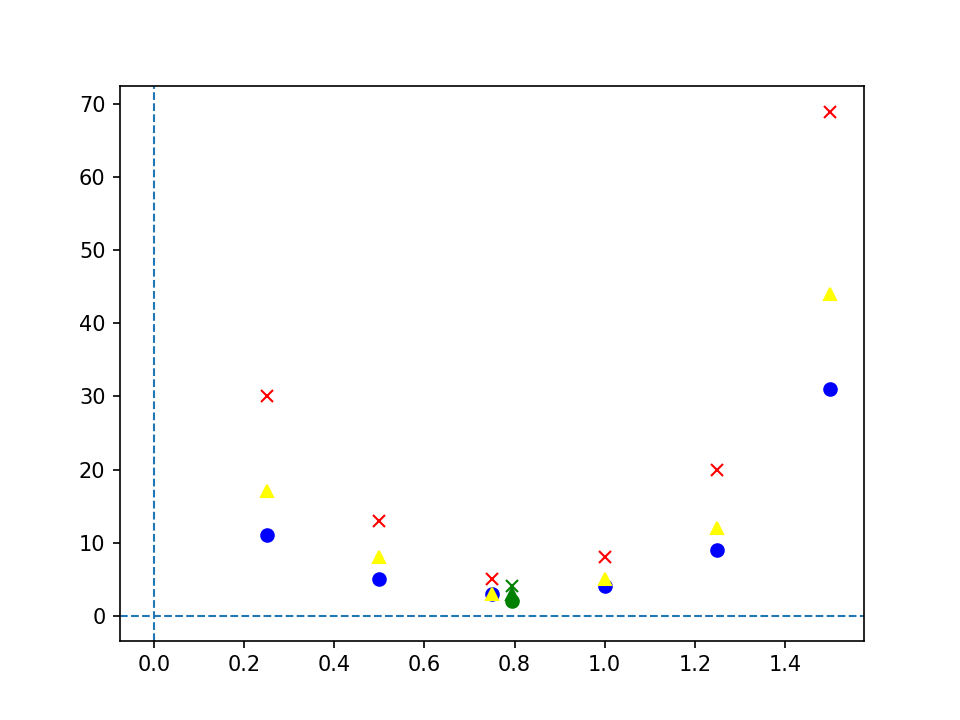

In [15]:
eps1 = 0.001
eps2 = 0.000001
eps3 = 0.0001

a = [1, 0.5, 0.75, 0.25, 1.25, 1.5]

fig = plt.figure()
ax = fig.add_subplot()


def graph(a, f, color, el):
    return ax.plot(a, f, el, color=color, linewidth=2)


for i in a:
    graph(i, mpi(i, eps1)[0], 'blue', 'o')
    graph(i, mpi(i, eps2)[0], 'red', 'x')
    graph(i, mpi(i, eps3)[0], 'yellow', '^')


ax.axvline(0, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)

In [16]:
from scipy.optimize import minimize

opt_min = minimize(gen_prime, x0, args=1, bounds=[(0, 1)], method='SLSQP')
opt_max = minimize(gen_prime, x0, args=-1, bounds=[(0, 1)], method='SLSQP',)

a = 2 / (opt_min.__getitem__('fun') - opt_max.__getitem__('fun'))
print(a)

#строить не закрывая предыдущий график
graph(a, mpi(a, eps1)[0], 'green', 'o')
graph(a, mpi(a, eps2)[0], 'green', 'x')
graph(a, mpi(a, eps3)[0], 'green', '^')

0.7934168147877793


# 2. Inverse quadratic interpolation

Suppose we have three different consequitive iterates $x_0$, $x_1$ and $x_2$ and a function $f(x)$: $y_i = f(x_i)$.

Construct a unique parabola which passes through $(x_i, y_i)$. Take as a next approximation, $x_3$, the root of this parabola.

In order not to solve another nonlinear equation on each step, use an inverse interpolation: construct a second order polynomial $Q(y)$ such that $Q(y_i) = x_i$. Then $x_3 = Q(0)$.

Now, write a function which finds the solution using inverse quadratic interpolation up to a predefined accuracy $\epsilon$.

In [17]:
def f(x):
    return np.cos(x) / np.sin(x)


def inv_quad_interpolation(func, point_0, point_1, point_2, eps=0.001):
    step = 0
    while abs(point_2 - point_1) > eps:
        y0 = func(point_0)
        y1 = func(point_1)
        y2 = func(point_2)
        
        point_3 = (point_0 * y1 * y2) / ((y0 - y1) * (y0 - y2)) \
                + (point_1 * y0 * y2) / ((y1 - y0) * (y1 - y2)) \
                + (point_2 * y1 * y0) / ((y2 - y0) * (y2 - y1))
        point_0, point_1, point_2 = point_1, point_2, point_3
        
        step += 1
    return point_2, step

x0 = 0.6
x1 = 0.8
x2 = 1
step = 0

x3, step = inv_quad_interpolation(f, x0, x1, x2)

print("root is:", x3, f(x3))
print("steps:", step)

root is: 1.570796326598652 1.962446373773171e-10
steps: 4


Now implement your function to solve equation
$$x = \mbox{ctg}(x)$$
in the interval $x \in (0.5, 1)$ with $x_0 = 0.6$, $x_1 = 0.8$ and $x_2 = 1$. What is the solution for $\epsilon = 0.001$? How many iterations did it take to find it? (You will need the answers for Google Form).

# 3. Newton-Raphson method

Implement the Newton-Raphson method to solve equation $z^3 - 1 = 0$ for complex $z$. Visualize and describe the convergence domain.

In [8]:
def f(z):
    return z**3 - 1


def fprime(z):
    return 3 * z**2


def newton_raphson(f, fprime, x0, eps=0.001):
    x = x0
    while abs(f(x)) > eps:
        x = x - f(x)/fprime(x)
    return x

x1 = newton_raphson(f, fprime, 1+1j)
x2 = newton_raphson(f, fprime, -1+1j)
x3 = newton_raphson(f, fprime, -1-1j)


print("root is:", x1)
print("root1 is:", x2)
print("root2 is:", x3)

root is: (1.0001341442102127-9.532218509626742e-05j)
root1 is: (-0.4999999113699129+0.8660249031568892j)
root2 is: (-0.4999999113699129-0.8660249031568892j)


In [9]:
plt.axvline(0.95, ls='--', lw=1); plt.axhline(0, ls='--', lw=1)
plt.plot()
plt.scatter(1, 1, color='green', s=40, marker='*')
plt.scatter(x1.real, x1.imag, color='green', marker='o')

plt.scatter(-1, 1, color='blue', s=40, marker='*')
plt.scatter(x2.real, x2.imag, color='blue', marker='o')

plt.scatter(-1, -1, color='red', s=40, marker='*')
plt.scatter(x3.real, x3.imag, color='red', marker='o')

plt.show()

In [10]:
'''xvalues = np.array([x1.real, x2.real, x3.real])
yvalues = np.array([x1.imag, x2.imag, x3.imag])
xx, yy = np.meshgrid(xvalues, yvalues, sparse=True)
plt.scatter(xx, yy, marker='.', color='k')

plt.show()'''

"xvalues = np.array([x1.real, x2.real, x3.real])\nyvalues = np.array([x1.imag, x2.imag, x3.imag])\nxx, yy = np.meshgrid(xvalues, yvalues, sparse=True)\nplt.scatter(xx, yy, marker='.', color='k')\n\nplt.show()"

NameError: name 'line' is not defined

Hint: visualize the convergence domain as a scatter plot of coloured points (the colour of the point depends on the root it converged to).